# Image Enhancement

Image Enhancement memiliki dua keluarga metode utama, yaitu
1. pixel-based methods : piksel individu tidak terpengaruh oleh piksel tetangga
2. spatial-based mathods : piksel tetangga menentukan piksel individu

**Pixel-based method** :
Dioperasikan pada pixel individual dengan nilai intensitas $s = T(r)$ dengan s adalah intensitas baru, T adalah fungsi transformasi, dan r adalah intesitas asal.

Terdiri dari beberapa method :
a. image negatives
b. logaritmic transform
c. contrast stretching
d. gray-level slicing
e. bit-plane slicing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

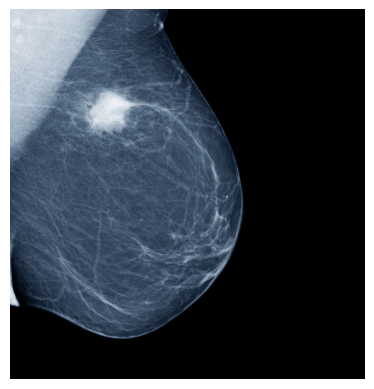

In [2]:
# Read the image from file
image = cv.imread('img/breast-xray.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Image Negatives


- berfungsi baik untuk gambar dengan background gelap --> kita ingin menangkap aspek-aspek non-bg yang penting, biasanya berwarna lebih terang

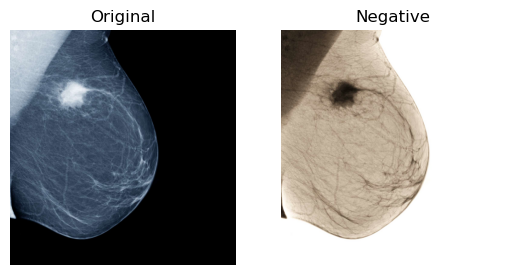

In [3]:
# fungsi untuk mengubah gambar menjadi negatif
def negative(image):
    return 255 - image

# memuat gambar
image = cv.imread('img/breast-xray.jpg')

# mengubah gambar menjadi negatif
negative_image = negative(image)

# menampilkan gambar asli dan negatif
img_toShow = [image, negative_image]
titles = ['Original', 'Negative']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(img_toShow[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

## Logaritmic Transform

$s = T(r) = c.log(1+r)$


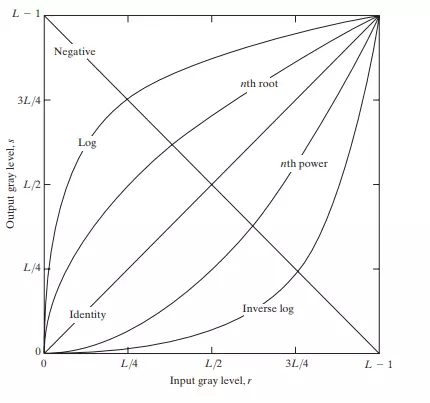

- berusaha menaikkan dengan laju kenaikan yang tinggi pada piksel dengan intensitas rendah dan menaikkan dengan laju rendah pada piksel dengan intensitas tinggi

## Diketahui rumus **log transform**:

\[
s = c \cdot \log(1 + r)
\]

### Langkah-langkah untuk mencari **invers log transform**:

1. Isolasi logaritma:
   \[
   \frac{s}{c} = \log(1 + r)
   \]

2. Gunakan eksponensial (basis \( e \)) di kedua sisi:
   \[
   e^{\frac{s}{c}} = e^{\log(1 + r)}
   \]

3. Karena sifat eksponensial dan logaritma (\( e^{\log x} = x \)), maka:
   \[
   e^{\frac{s}{c}} = 1 + r
   \]

4. Isolasi \( r \):
   \[
   r = e^{\frac{s}{c}} - 1
   \]

### Jadi, rumus **inverse log transform** adalah:
\[
r = e^{\frac{s}{c}} - 1
\]


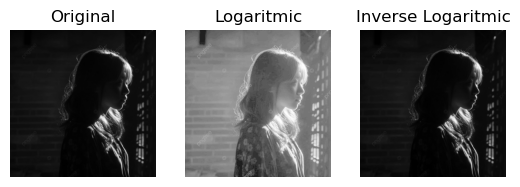

In [4]:
def logaritmic(image):
    c = 255 / np.log(1 + np.max(image))  # Scaling factor
    return c * np.log1p(image)

def inverse_logaritmic(image):
    c = 255 / np.log(1 + np.max(image))
    return np.exp(image / c) - 1

image = cv.imread('img/girl-low brightness.jpg', cv.IMREAD_GRAYSCALE)

log_image = logaritmic(image)
log_image = np.array(log_image, dtype=np.uint8)

inverse_log_image = inverse_logaritmic(log_image)
inverse_log_image = np.array(inverse_log_image, dtype=np.uint8)

image_toShow = [image, log_image, inverse_log_image]
titles = ['Original', 'Logaritmic', 'Inverse Logaritmic']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_toShow[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

Ada beberapa hal menarik yang bisa didapat dari image enhancement di atas, yaitu
1. motif bunga-bunga pada baju wanita tersebut menjadi terlihat
2. motif dinding batu-bata menjadi jelas
3. tampak wajah wanita menjadi lebih jelas 

## Gamma Transform

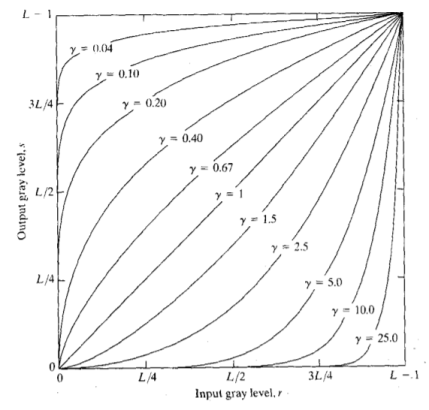

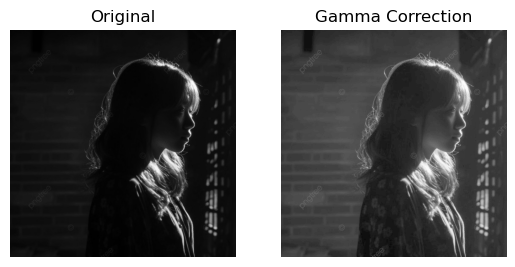

In [5]:
def gamma_correction(image, gamma):
    table = np.array([((i / 255) ** gamma) * 255
        for i in np.arange(0, 256)]).astype('uint8')
    return cv.LUT(image, table)

image = cv.imread('img/girl-low brightness.jpg', cv.IMREAD_GRAYSCALE)
gamma_correction_image = gamma_correction(image, 0.5)

image_toShow = [image, gamma_correction_image]
titles = ['Original', 'Gamma Correction']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(image_toShow[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

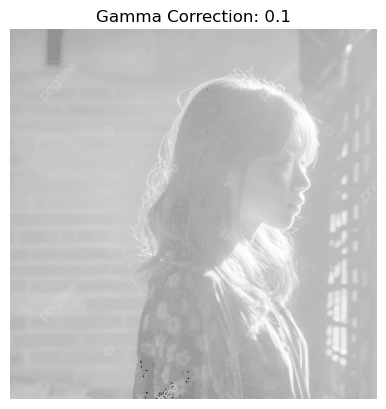

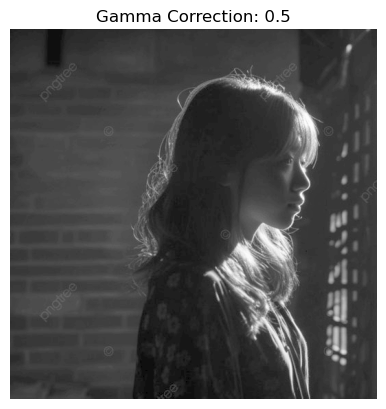

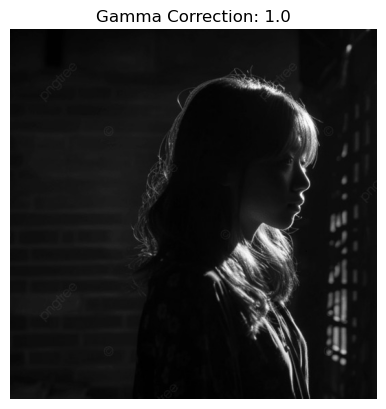

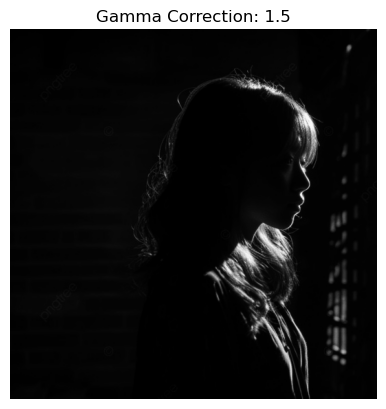

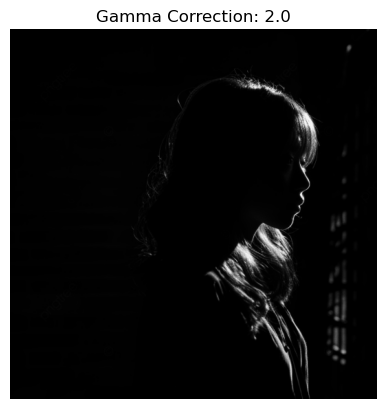

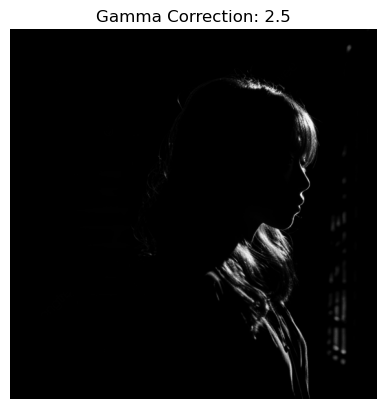

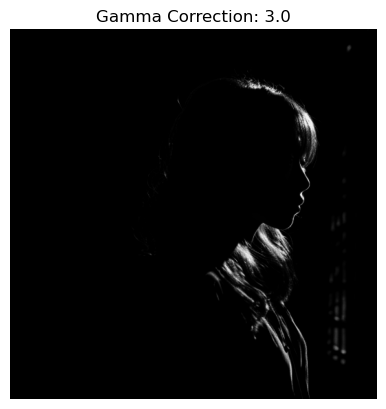

In [6]:
# loop over varius gamma values
for gamma in np.arange(0.0, 3.5, 0.5):
    gamma = gamma if gamma > 0 else 0.1
    gamma_corrected = gamma_correction(image, gamma)
    plt.figure()
    plt.imshow(gamma_corrected, cmap='gray')
    plt.axis('off')
    plt.title('Gamma Correction: {}'.format(gamma))

## Histogram Equalization
usaha untuk menyebarkan rata frekuensi intensitas di dalam citra

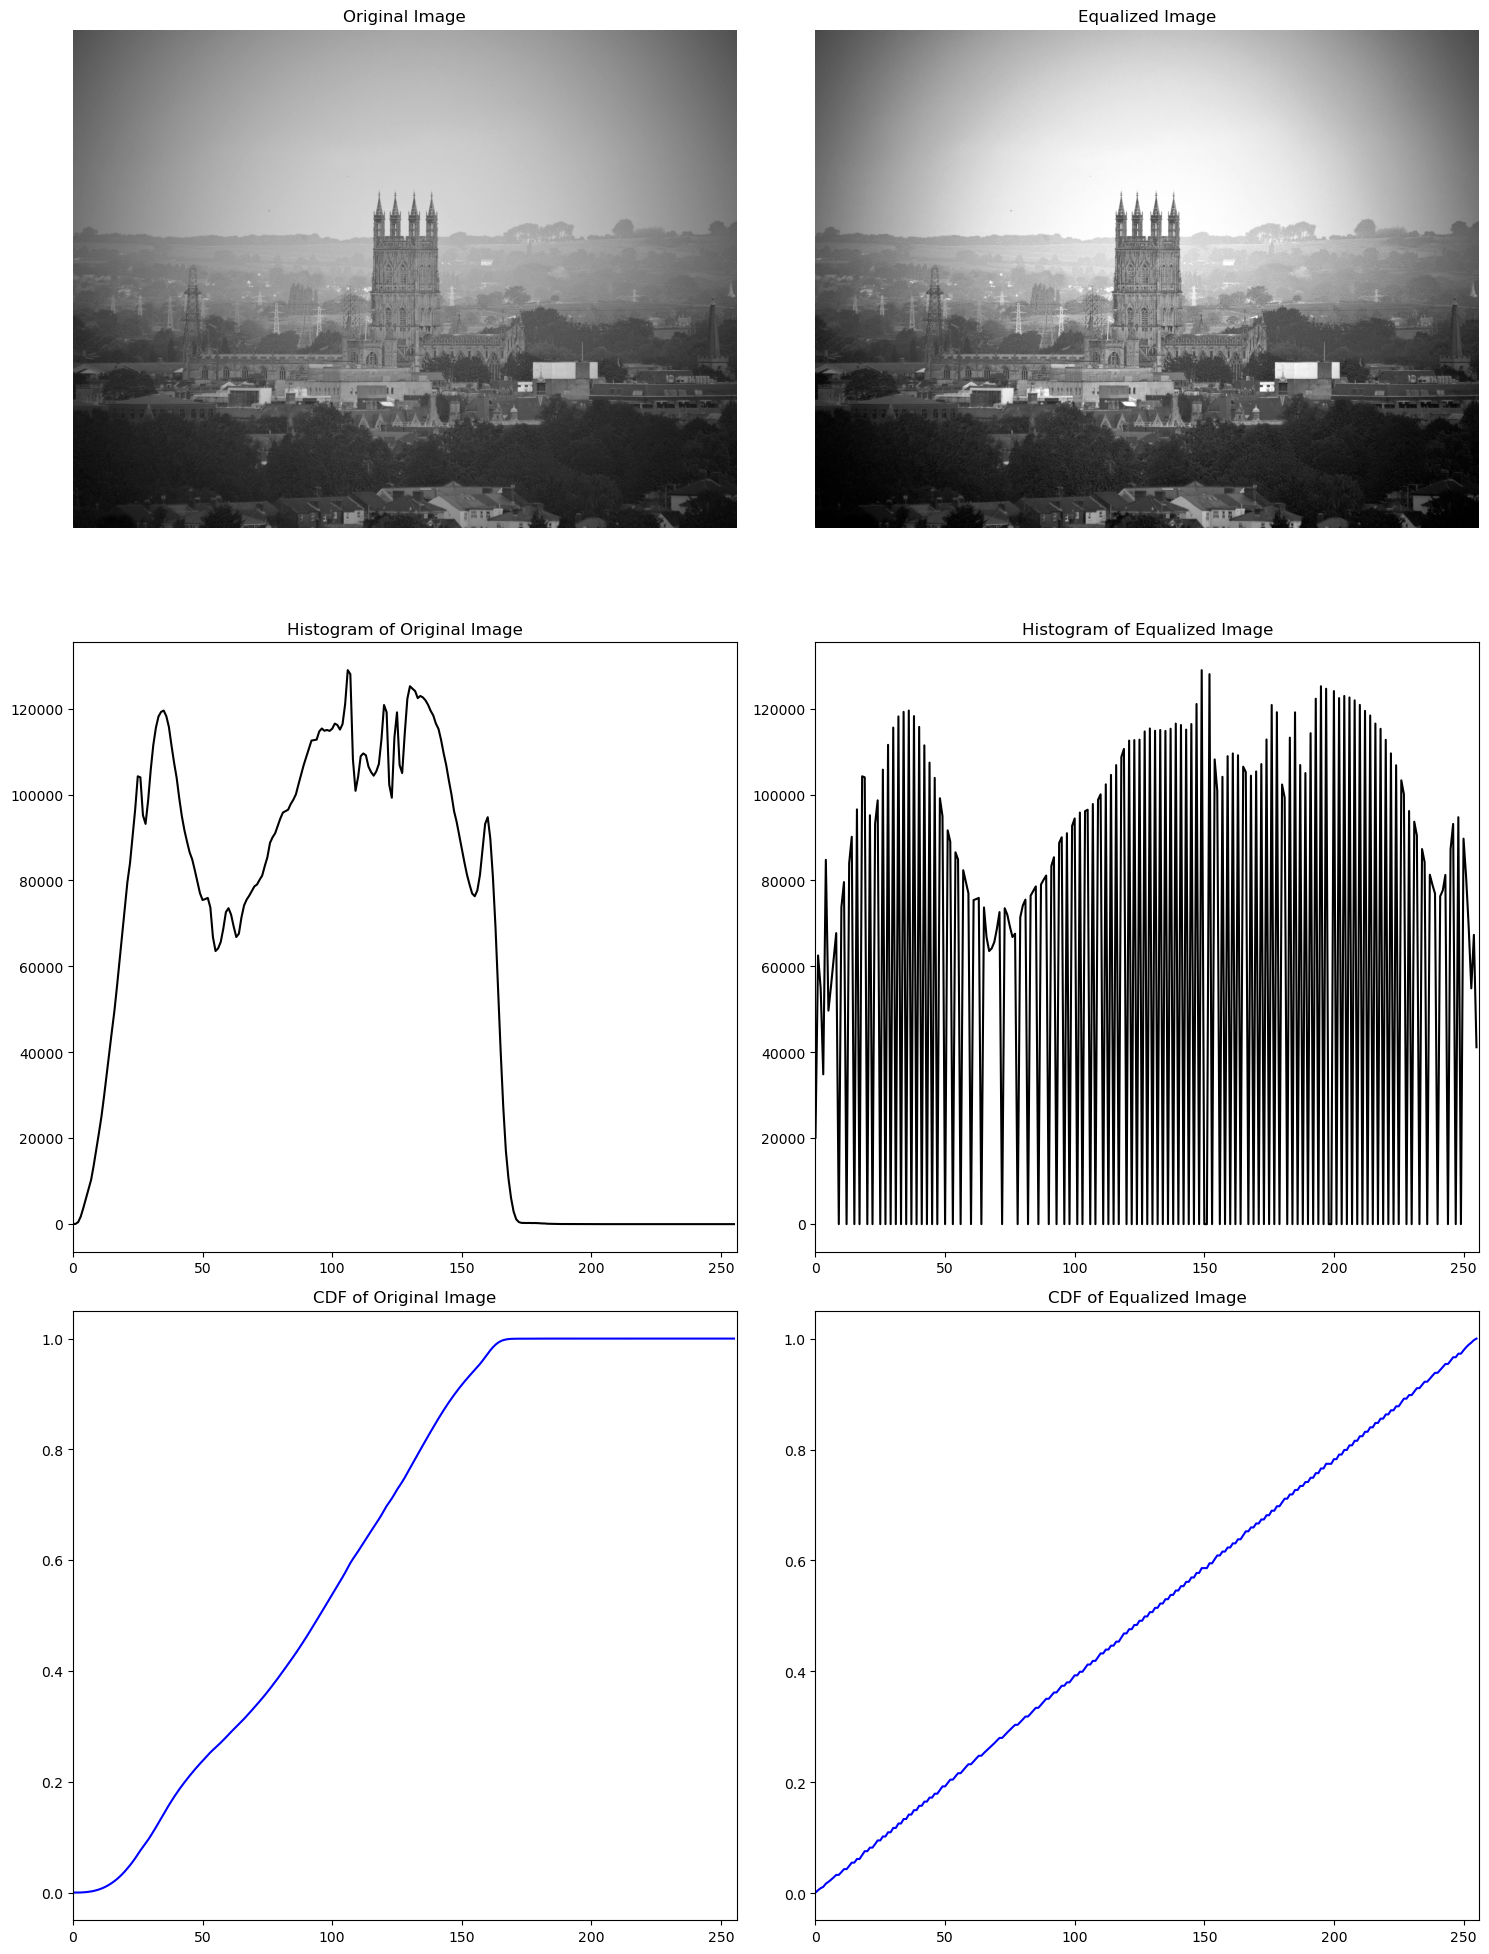

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
low_contrast_image = cv.imread('img/low-contrast-castile.jpg', cv.IMREAD_GRAYSCALE)

# Histogram gambar asli
hist_original = cv.calcHist([low_contrast_image], [0], None, [256], [0, 256])
cdf_original = hist_original.cumsum()  # Menghitung CDF
cdf_original = cdf_original / cdf_original.max()  # Normalisasi ke [0,1]

# Equalization
equalized_image = cv.equalizeHist(low_contrast_image)

# Histogram gambar setelah equalization
hist_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
cdf_equalized = hist_equalized.cumsum()  # Menghitung CDF
cdf_equalized = cdf_equalized / cdf_equalized.max()  # Normalisasi ke [0,1]

# Buat figure dan axes dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Plot Gambar Original
axes[0, 0].imshow(low_contrast_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot Histogram Gambar Original
axes[1, 0].plot(hist_original, color='black')
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlim([0, 256])

# Plot CDF Gambar Original
axes[2, 0].plot(cdf_original, color='blue')
axes[2, 0].set_title('CDF of Original Image')
axes[2, 0].set_xlim([0, 256])

# Plot Gambar Setelah Equalization
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')

# Plot Histogram Gambar Equalized
axes[1, 1].plot(hist_equalized, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlim([0, 256])

# Plot CDF Gambar Equalized
axes[2, 1].plot(cdf_equalized, color='blue')
axes[2, 1].set_title('CDF of Equalized Image')
axes[2, 1].set_xlim([0, 256])

# Menampilkan semua plot
plt.tight_layout()
plt.show()


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# membaca gambar original
low_contrast_castile = cv.imread('img/low-contrast-castile.jpg', cv.IMREAD_GRAYSCALE)

# membuat histogramn. sintaks : cv.calcHist([list-images], [channel ke berapa], mask?, [banyaknya bins, kelas], [rentang nilai])
original_hist = cv.calcHist('low_contrast_castile', [0], None, [256], [0, 256])

# membuat cdf
original_cdf = original_hist.cumsum()
original_cdf = original_cdf/original_cdf.max() # normalisasi, karena frekuensi piksel terakhir bisa sampai 256x256

# equalization
equalized_image = cv.equalizeHist(low_contrast_castile)

# membuat histogramn. sintaks : cv.calcHist([list-images], [channel ke berapa], mask?, [banyaknya bins, kelas], [rentang nilai])
equalized_hist = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# membuat cdf
equalized_cdf = equalized_hist.cumsum()
equalized_cdf = equalized_cdf/equalized_cdf.max() # normalisasi, karena frekuensi piksel terakhir bisa sampai 256x256

# membuat figure dan axes dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(3, 2, figsize=(15, 20)) # 3 baris, 2 kolom, lebar 15, tinggi 20

# visualisasi gambar original
axes[0, 0].imshow(low_contrast_castile, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

# visualisasi histogram gambar original
axes[1, 0].plot(original_hist, color='black')
axes[1, 0].set_title('Histogram of Original Image') 
axes[1, 0].set_xlim([0, 256])

# visualisasi cdf gambar original
axes[2, 0].plot(original_cdf, color='blue')
axes[2, 0].set_title('CDF of Original Image')   
axes[2, 0].set_xlim([0, 256])

# visualisasi gambar equalized
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')

# visualisasi histogram gambar equalized
axes[1, 1].plot(equalized_hist, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlim([0, 256])

# visualisasi cdf gambar equalized
axes[2, 1].plot(equalized_cdf, color='blue')
axes[2, 1].set_title('CDF of Equalized Image')
axes[2, 1].set_xlim([0, 256])

# menampilkan semua plot
plt.tight_layout()
plt.show()


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - Can't parse 'images'. Sequence item with index 0 has a wrong type
>  - Can't parse 'images'. Sequence item with index 0 has a wrong type
